<a href="https://colab.research.google.com/github/vaibhav514/water-level-prediction/blob/main/Water_Level_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---WATER LEVEL PREDICITION FOR EPICS---



In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

Load data

In [ ]:
data = pd.read_csv('waterlevels.csv')
X = data.drop(['Water Level'], axis=1)
y = data['Water Level'].values.reshape(-1, 1)
evap = data['Evaporation'].values.reshape(-1, 1)
salinity = data['Salinity'].values.reshape(-1,1 )
precipitation = data['Precipitation'].values.reshape(-1, 1)

Checking data

In [ ]:
data.head()

,Precipitation,Water Level,Salinity,Evaporation
0,71.966667,334.133462,65.0,14.735714
1,112.875000,334.133462,71.5,14.735714
2,77.225000,334.133462,71.5,14.735714
3,123.466667,282.060000,71.5,14.735714
4,58.433333,189.293000,71.5,14.735714


Normalize data

In [ ]:
min_max_list=[]
temp=[]


# for i in data.columns:
#     print(df[i].max())
#     print(df[i].min())
    
    

for i in data.columns:
    temp.append(data[i].max())
    temp.append(data[i].min())
    min_max_list.append(temp)
    temp=[]

min_max_list

[[123.4666667, 58.43333333], [663.114, 189.293], [89.0, 56.0], [17.5, 11.325]]

Combine X and evap, salinity, and precipitation data

In [ ]:
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)

scaler_evap = MinMaxScaler()
evap = scaler_evap.fit_transform(evap)

scaler_salinity = MinMaxScaler()
salinity = scaler_salinity.fit_transform(salinity)

scaler_precipitation = MinMaxScaler()
precipitation = scaler_precipitation.fit_transform(precipitation)

another way to Combine X and evap, salinity, and precipitation data

In [ ]:
# X = np.concatenate((X, evap, salinity, precipitation), axis=1)

Split data into training and testing sets

In [ ]:
split = int(0.9* len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

Define MLP model with ReLU activation

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=(X.shape[1]), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,  activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

Train model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 2s 97ms/step - loss: 0.2456 - val_loss: 0.1320
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.1028 - val_loss: 0.0425
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0359 - val_loss: 0.0116
Epoch 4/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0134 - val_loss: 0.0035
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0093 - val_loss: 0.0057
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0100 - val_loss: 0.0059
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0090 - val_loss: 0.0039
Epoch 8/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0073 - val_loss: 0.0023
Epoch 9/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0066 - val_loss: 0.0019
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0064 - val_loss: 0.0017
Epoch 11/100
6/6 [=

Evaluate model on training set

In [ ]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Training loss:', train_score)

Training loss: 0.0032818091567605734


Evaluate model on testing set

In [ ]:
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Testing loss:', test_score)


Testing loss: 0.0006801553536206484


In [ ]:
X_test

array([[0.71986837, 0.46969697, 0.71255061],
       [0.76596075, 0.46969697, 0.78137652],
       [0.59035005, 0.46969697, 0.5951417 ],
       [0.36432388, 0.46969697, 0.5708502 ],
       [0.76632235, 0.46969697, 0.5523424 ],
       [0.60332797, 0.46969697, 0.56275304],
       [0.57452225, 0.46969697, 0.36032389],
       [0.54782486, 0.46969697, 0.16194332],
       [0.49079006, 0.46969697, 0.5523424 ],
       [0.52423519, 0.27272727, 0.5523424 ],
       [0.60171365, 0.46969697, 0.5523424 ],
       [0.68193151, 0.46969697, 0.5523424 ],
       [0.68223177, 0.46969697, 0.5523424 ],
       [0.6989503 , 0.46969697, 0.5523424 ],
       [0.39558218, 0.66666667, 0.2145749 ],
       [0.7699137 , 0.46969697, 0.5523424 ],
       [0.50157674, 0.27272727, 0.74898785],
       [0.56481886, 0.46969697, 0.5523424 ],
       [0.69972695, 0.46969697, 0.5523424 ],
       [0.78711716, 0.33333333, 0.20647773],
       [0.59500735, 0.60606061, 0.        ],
       [0.44776944, 0.46969697, 0.5523424 ]])

Make predictions

In [ ]:
y_test *= 1000
y_test += 35
predictions = scaler_y.inverse_transform(model.predict(X_test))

1/1 [==============================] - 0s 98ms/step


Plot predictions against actual values

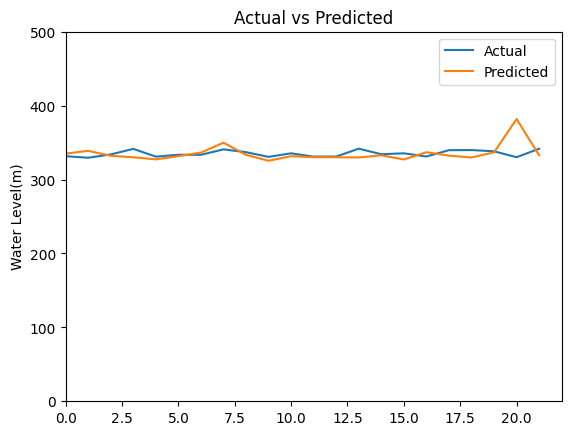

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlim(0,22)
plt.ylim(0,500)
plt.ylabel("Water Level(m)")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
type(X_test[0])
X_test[0]

array([0.71986837, 0.46969697, 0.71255061])

Plot loss curves for training and testing sets

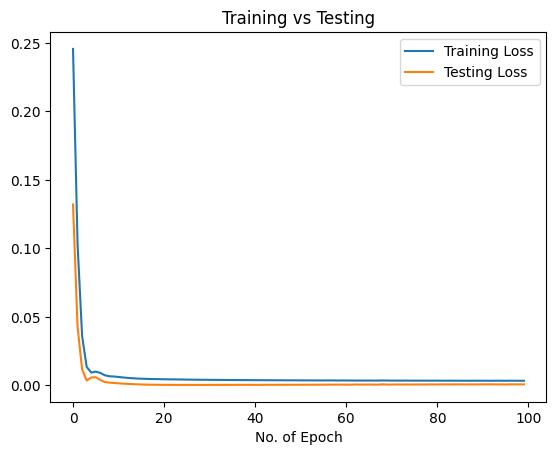

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel("No. of Epoch")
plt.title("Training vs Testing")
plt.legend()
plt.show()


In [ ]:
model.save('model.h5')